# Thuật toán Perceptron Learning Algorithm

## Bước 1: Cài đặt thư viện

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


##  Bước 2: Chuẩn bị dữ liệu

In [48]:

def prepare_data(N=100):
    
    # Tạo dữ liệu cho lớp 1 (nằm trên đường thẳng y = x + 1)
    X_class_1 = np.random.randn(N, 2) + np.array([2, 7])
    y_class_1 = np.zeros(N)  # Gán nhãn lớp 1 là 0

    # Tạo dữ liệu cho lớp 2 (nằm dưới đường thẳng y = x + 1)
    X_class_2 = np.random.randn(N, 2) + np.array([2, 1])
    y_class_2 = np.ones(N)   # Gán nhãn lớp 2 là 1

    # Kết hợp dữ liệu
    X = np.vstack((X_class_1, X_class_2))
    y = np.hstack((y_class_1, y_class_2))

    # Chia dữ liệu thành tập huấn luyện và kiểm thử
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train, X_test, y_train, y_test


## Buớc 3: Xây dụng PLA

In [49]:
# Class Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate  # Tốc độ học
        self.n_iters = n_iters  # Số lần lặp
        self.weights = None  # Trọng số sẽ được khởi tạo sau
        self.bias = None  # Bias sẽ được khởi tạo sau
    
    # Hàm step function (hàm kích hoạt)
    def step_function(self, x):
        
        # Kiểm tra xem x có phải là mảng hay không
        if isinstance(x, np.ndarray):
            # Tạo một mảng rỗng có cùng kích thước với x
            output = np.zeros_like(x)
            
            for i in range(len(x)):
                output[i] = 1 if x[i] >= 0 else 0  # Gán giá trị 1 hoặc 0 dựa trên điều kiện
        else:
            # Nếu x là giá trị đơn, trả về 1 hoặc 0 trực tiếp
            output = 1 if x >= 0 else 0
        return output

    
    # Hàm khởi tạo trọng số và bias
    def initialize_weights(self, n_features):
        self.weights = np.zeros(n_features)  # Khởi tạo trọng số bằng 0
        self.bias = 0  # Khởi tạo bias bằng 0
    
    # Huấn luyện Perceptron với kiểm tra hội tụ
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.initialize_weights(n_features)
        
        for it in range(self.n_iters):
            no_update = True  # Giả định rằng không có cập nhật trọng số nào trong lần lặp này
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step_function(linear_output)
                
                # Cập nhật trọng số và bias nếu phân loại sai
                update = self.learning_rate * (y_train[idx] - y_predicted)
                if update != 0:  # Nếu có thay đổi trong trọng số
                    self.weights += update * x_i
                    self.bias += update
                    no_update = False  # Có cập nhật, nghĩa là chưa hội tụ

            # Nếu không có bất kỳ thay đổi nào, thì mô hình đã hội tụ
            if no_update:
                print(f"Mô hình hội tụ sau {it+1} lần lặp.")
                break
        else:
            print(f"Mô hình chưa hội tụ sau {self.n_iters} lần lặp.")

    # Hàm dự đoán với mô hình đã huấn luyện
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)


## Bước 4: Đánh giá mô hình (độ chính xác)

In [50]:
def evaluate_model(X_test, y_test, perceptron):
    y_pred = perceptron.predict(X_test)
    accuracy = np.mean(y_pred == y_test) * 100
    print(f"Độ chính xác của mô hình: {accuracy:.2f}%")
    return accuracy


## Bước 5: Trực quan hóa dữ liệu

In [51]:
def plot_decision_boundary(X_train, y_train, perceptron):
    # Lấy trọng số và bias từ mô hình Perceptron
    weights, bias = perceptron.weights, perceptron.bias

    # Vẽ dữ liệu của lớp 1 (y_train == 0) với màu xanh
    plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Class 1')
    # Vẽ dữ liệu của lớp 2 (y_train == 1) với màu đỏ
    plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Class 2')

    # Tạo dải giá trị x cho trục hoành
    x_values = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), 100)
    
    # Tính toán giá trị y cho đường quyết định dựa trên phương trình đường thẳng
    y_values = -(weights[0] * x_values + bias) / weights[1]
    
    # Vẽ đường quyết định bằng đường nét đứt (k--)
    plt.plot(x_values, y_values, 'k--', label='Đường quyết định')

    # Cài đặt nhãn cho trục x
    plt.xlabel('Đặc trưng 1')
    # Cài đặt nhãn cho trục y
    plt.ylabel('Đặc trưng 2')
    # Cài đặt tiêu đề cho biểu đồ
    plt.title('Biểu đồ phân tách các lớp')
    # Hiển thị chú thích cho các lớp và đường quyết định
    plt.legend()
    # Hiển thị biểu đồ
    plt.show()


## Bước 5: Thực thi chương trình

Mô hình hội tụ sau 14 lần lặp.
Độ chính xác của mô hình: 100.00%


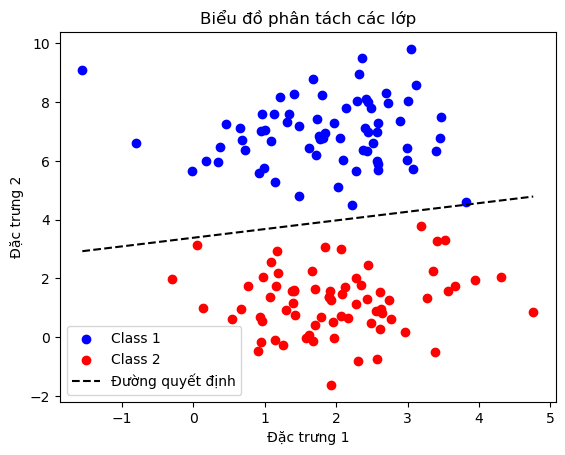

In [52]:
# Main function để chạy toàn bộ quy trình
def main():
    # Chuẩn bị dữ liệu
    X_train, X_test, y_train, y_test = prepare_data(N=100)

    # Tạo mô hình Perceptron
    perceptron = Perceptron(learning_rate=0.01, n_iters=1000)

    # Huấn luyện mô hình
    perceptron.fit(X_train, y_train)

    # Dự đoán và đánh giá mô hình
    evaluate_model(X_test, y_test, perceptron)

    # Trực quan hóa đường quyết định
    plot_decision_boundary(X_train, y_train, perceptron)

# Gọi hàm main
if __name__ == "__main__":
    main()
